<a href="https://colab.research.google.com/github/RomaViraj/APT/blob/master/Applied_Tech_Project_144_Solution_copy_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Instructions

#### Goal of the Project

This project is designed for you to practice and solve the activities that are based on the concepts covered in the lesson: 

**Hyperspectral Image Classification**

---

#### Problem Statement

As a data scientist, study the Hyperspectral Images (HSI) and classify different areas such as Crop Analysis, Geological Mapping, Mineral Exploration, Defence Research, Urban Investigation, Military Surveillance, etc. which can provide in-depth details about an area.

---

#### Dataset Description

The images were gathered by AVIRIS sensor over the Indian Pines test site in North-western Indiana and consist of 145*145 pixels and 224 spectral reflectance bands in the wavelength range $0.4–2.5$ $10^{-6}$ meters. This image is a subset of a larger one. The Indian Pines scene contains two-thirds agriculture, and one-third forest or other natural perennial vegetation. There are two major dual lane highways, a rail line, as well as some low density housing, other built structures, and smaller roads. Since the scene is taken in June some of the crops present, corn, soybeans, are in the early stages of growth with less than 5% coverage. 

The ground truth available is designated into sixteen classes and is not all mutually exclusive. Using these classes, we will make a classification model to classify the different classes.

**Dataset Source**: https://purr.purdue.edu/publications/1947/1

**Dataset Citation**: 
Marion F. Baumgardner, Larry L. Biehl, & David A. Landgrebe. (2015). 220 Band AVIRIS Hyperspectral Image Data Set: June 12, 1992, Indian Pine Test Site 3. Purdue University Research Repository. doi:10.4231/R7RX991C



---

### List of Activities
 
**Activity 1:** Import Modules and Read Data

**Activity 2:** Plot the Ground Truth Data Bands

**Activity 3:** Reduce Dimensions Using PCA

**Activity 4:** Create a Classification Model

---

#### Activity 1: Import Modules and Read Data

1. Download and load the data files
2. Store the HSI Pixel values in 2 different variables for Indian Pines and Indian Pines Ground Truth.

Download the data files using the `wget` command.

**Links -** 

1. Indian Pines Corrected Data - http://www.ehu.eus/ccwintco/uploads/6/67/Indian_pines_corrected.mat
2. Indian Pines Ground Truth Data - http://www.ehu.eus/ccwintco/uploads/c/c4/Indian_pines_gt.mat

In [ ]:
# Use wget to download the .mat files from the links
!wget http://www.ehu.eus/ccwintco/uploads/6/67/Indian_pines_corrected.mat
!wget http://www.ehu.eus/ccwintco/uploads/c/c4/Indian_pines_gt.mat

--2022-03-02 12:00:12--  http://www.ehu.eus/ccwintco/uploads/6/67/Indian_pines_corrected.mat
Resolving www.ehu.eus (www.ehu.eus)... 158.227.0.65, 2001:720:1410::65
Connecting to www.ehu.eus (www.ehu.eus)|158.227.0.65|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5953527 (5.7M)
Saving to: ‘Indian_pines_corrected.mat’

Indian_pines_correc 100%[===================>]   5.68M   754KB/s    in 8.9s    

2022-03-02 12:00:22 (650 KB/s) - ‘Indian_pines_corrected.mat’ saved [5953527/5953527]

--2022-03-02 12:00:22--  http://www.ehu.eus/ccwintco/uploads/c/c4/Indian_pines_gt.mat
Resolving www.ehu.eus (www.ehu.eus)... 158.227.0.65, 2001:720:1410::65
Connecting to www.ehu.eus (www.ehu.eus)|158.227.0.65|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1125 (1.1K)
Saving to: ‘Indian_pines_gt.mat’

Indian_pines_gt.mat 100%[===================>]   1.10K  --.-KB/s    in 0s      

2022-03-02 12:00:22 (125 MB/s) - ‘Indian_pines_gt.mat’ saved [1125/1125]



Load the data files using the `loadmat` function and get the data from both. 
 - For Indian Pines Corrected, the link would be:  `/content/Indian_pines_corrected.mat`
 - For Indian Pines ground truth, the link would be: `/content/Indian_pines_gt.mat`


In [ ]:
# Import the packages
from scipy.io import loadmat
import pandas as pd
import numpy as np

# Load the .mat files
pines = loadmat('/content/Indian_pines_corrected.mat')
pines_gt = loadmat('/content/Indian_pines_gt.mat')
print(pines)
print(pines_gt)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri May 20 18:47:44 2011', '__version__': '1.0', '__globals__': [], 'indian_pines_corrected': array([[[3172, 4142, 4506, ..., 1057, 1020, 1020],
        [2580, 4266, 4502, ..., 1064, 1029, 1020],
        [3687, 4266, 4421, ..., 1061, 1030, 1016],
        ...,
        [2570, 3890, 4320, ..., 1042, 1021, 1015],
        [3170, 4130, 4320, ..., 1054, 1024, 1020],
        [3172, 3890, 4316, ..., 1043, 1034, 1016]],

       [[2576, 4388, 4334, ..., 1047, 1030, 1006],
        [2747, 4264, 4592, ..., 1055, 1039, 1015],
        [2750, 4268, 4423, ..., 1047, 1026, 1015],
        ...,
        [3859, 4512, 4605, ..., 1056, 1035, 1015],
        [3686, 4264, 4690, ..., 1051, 1012, 1020],
        [2744, 4268, 4597, ..., 1047, 1019, 1016]],

       [[2744, 4146, 4416, ..., 1055, 1029, 1025],
        [2576, 4389, 4416, ..., 1051, 1021, 1011],
        [2744, 4273, 4420, ..., 1068, 1033, 1010],
        ...,
        [2570, 4266, 4509, ..

1. Store the value of key `indian_pines_corrected` in a variable `X_data`. 
2. Store the value of key `indian_pines_gt` in a variable `y_data`.

In [ ]:
# Obtain the HSI pixel values stored as an array in the above dictionaries.
X_data = pines['indian_pines_corrected']
y_data = pines_gt['indian_pines_gt']

Get the shape of both the data variables.

In [ ]:
# Get the shape of the KSC data
print(X_data.shape)
print(y_data.shape)

(145, 145, 200)
(145, 145)


**Q:** What is the number of spectral bands of the Indian Pines images?

**A:** 200 bands 

<br>

---

#### Activity 2: Plot the Ground Truth Data Bands

Plot the Indian Pines ground truth data using the `imshow()` function. Also, pass `cmap = 'cubehelix'` to set colours for the colormap. Put a colourbar to differentiate the classes.

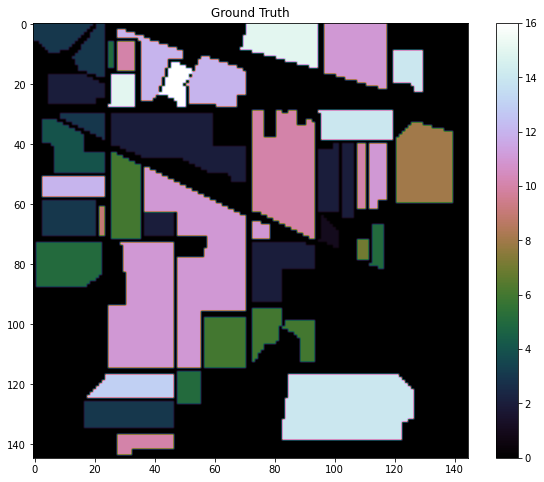

In [ ]:
# Plot ground truth image with cmap='cubehelix'
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.imshow(y_data, cmap = 'cubehelix')
plt.title('Ground Truth')
plt.colorbar()
plt.show()

**Q :** What is the total number of classes of spectral bands?
 
**A :** 16.




---

#### Activity 3: Reduce Dimensions Using PCA

1. Convert the three-dimensional array `X_data` into a two-dimensional array.

2. Create a new DataFrame from the reshaped data with 200 columns (Band 1 - Band 200) and a `class` column.

3. Reducing the dimensions using `PCA`.

4. Create a new DataFrame after merging the reduced dimension DataFrame and `class` column.

5. Scale the DataFrame using `StandardScaler()` function.

Convert the three-dimensional array `X_data` into a two-dimensional array using `reshape()` function.

In [ ]:
# Reshape the Indian Pines Data
pines_data_reshaped = X_data.reshape(-1, X_data.shape[2])

Create a new DataFrame from the reshaped data where the columns of this DataFrame would be `Band 1` to `Band 200`. Also, add a column `class` that contains the classes obtained from the ground truth. For this, use `ravel()` function to flatten the 2D ground truth array.



In [ ]:
# Create a DataFrame from the reshaped data
df = pd.DataFrame(pines_data_reshaped)
df.columns = [f'Band {i}' for i in range(1, 201)]

# Create a class column with the ground truth data
df['class'] = y_data.ravel()

df.head()

,Band 1,Band 2,Band 3,Band 4,Band 5,Band 6,Band 7,Band 8,Band 9,Band 10,Band 11,Band 12,Band 13,Band 14,Band 15,Band 16,Band 17,Band 18,Band 19,Band 20,Band 21,Band 22,Band 23,Band 24,Band 25,Band 26,Band 27,Band 28,Band 29,Band 30,Band 31,Band 32,Band 33,Band 34,Band 35,Band 36,Band 37,Band 38,Band 39,Band 40,...,Band 162,Band 163,Band 164,Band 165,Band 166,Band 167,Band 168,Band 169,Band 170,Band 171,Band 172,Band 173,Band 174,Band 175,Band 176,Band 177,Band 178,Band 179,Band 180,Band 181,Band 182,Band 183,Band 184,Band 185,Band 186,Band 187,Band 188,Band 189,Band 190,Band 191,Band 192,Band 193,Band 194,Band 195,Band 196,Band 197,Band 198,Band 199,Band 200,class
0,3172,4142,4506,4279,4782,5048,5213,5106,5053,4750,4816,4769,4610,4805,4828,4861,4767,4624,4549,4463,4462,4446,4445,4336,4381,4319,4207,4305,4311,3991,4168,3942,4061,4362,4318,4252,4869,5284,5055,3591,...,1396,1381,1396,1381,1353,1346,1341,1332,1324,1310,1318,1330,1310,1292,1280,1275,1266,1264,1233,1241,1232,1215,1215,1187,1168,1171,1150,1134,1123,1135,1094,1090,1112,1090,1062,1069,1057,1020,1020,3
1,2580,4266,4502,4426,4853,5249,5352,5353,5347,5065,5141,5100,4994,5172,5290,5289,5217,5053,5033,4939,4931,4941,4902,4824,4859,4805,4698,4794,4806,4452,4628,4433,4643,4967,4853,4760,5449,5768,5684,3987,...,1421,1415,1428,1415,1379,1370,1360,1353,1352,1336,1346,1351,1330,1315,1305,1292,1282,1286,1259,1259,1250,1229,1232,1195,1177,1184,1153,1137,1138,1137,1108,1104,1117,1091,1079,1085,1064,1029,1020,3
2,3687,4266,4421,4498,5019,5293,5438,5427,5383,5132,5227,5172,5097,5313,5411,5412,5341,5191,5140,5069,5110,5119,5046,4981,5023,4987,4862,4965,4992,4595,4756,4529,4801,5077,4983,4868,5515,5972,5913,4027,...,1446,1440,1443,1425,1390,1379,1376,1363,1355,1347,1361,1356,1341,1330,1321,1304,1290,1289,1263,1269,1261,1245,1241,1214,1185,1188,1156,1147,1149,1144,1111,1114,1114,1100,1065,1092,1061,1030,1016,3
3,2749,4258,4603,4493,4958,5234,5417,5355,5349,5096,5147,5078,5040,5237,5321,5344,5255,5121,5035,4956,4994,4980,4905,4857,4900,4831,4720,4848,4847,4484,4613,4402,4674,4966,4848,4776,5473,5894,5789,4086,...,1432,1427,1426,1416,1386,1374,1375,1359,1343,1343,1354,1351,1333,1329,1313,1296,1280,1281,1251,1255,1253,1238,1223,1207,1188,1188,1154,1143,1144,1146,1122,1108,1109,1109,1071,1088,1060,1030,1006,3
4,2746,4018,4675,4417,4886,5117,5215,5096,5098,4834,4853,4857,4734,4879,4976,4958,4885,4754,4647,4532,4586,4591,4492,4453,4497,4398,4297,4408,4401,4102,4227,4075,4264,4529,4490,4438,5001,5378,5321,3779,...,1401,1397,1395,1390,1368,1349,1354,1340,1330,1324,1336,1332,1320,1307,1287,1283,1267,1265,1239,1240,1239,1229,1212,1202,1178,1178,1143,1135,1138,1135,1110,1107,1112,1094,1072,1087,1052,1034,1019,3


Reducing the dimensions using `PCA` with `n_components = 3`.

In [ ]:
# Import PCA from sklearn.decomposition
from sklearn.decomposition import PCA

# Make a PCA Constructor with 3 components
pca_obj = PCA(n_components = 3)

# Fit and Transform the DataFrame
pca_features = pca_obj.fit_transform(df.iloc[:, :-1].values)
pca_features

array([[ 5014.90598496,  1456.86326035,    72.6970148 ],
       [ 5601.38374305, -2023.45008662,   350.13466368],
       [ 5796.13544234, -3090.39485163,   490.54001043],
       ...,
       [-7369.83419812, -1132.38176565,   398.17011958],
       [-6497.08723914,   798.24003307,   676.80862107],
       [-6570.46116092,   346.7496221 ,   465.45051459]])

Creating a new DataFrame by merging the `class` column.

In [ ]:
# Obtain the PCA reduced DataFrame containing only 3 features and target variable.
pca_df = pd.concat([pd.DataFrame(pca_features), pd.DataFrame(data = y_data.ravel())], axis = 1)
pca_df.columns = [f'PC-{i}' for i in range(1, 4)] + ['class']
pca_df.head()

,PC-1,PC-2,PC-3,class
0,5014.905985,1456.863260,72.697015,3
1,5601.383743,-2023.450087,350.134664,3
2,5796.135442,-3090.394852,490.540010,3
3,5586.204575,-2369.376085,356.274679,3
4,5020.990792,339.603390,-23.007571,3


Scaling the new PCA DataFrame using `StandardScaler()` from `sklearn.preprocessing` package.

In [ ]:
# Import StandardScaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

# Obtain features from the DataFrame
features = pca_df.iloc[:, :-1]

# Define StandardScaler object
standard_scaler = StandardScaler()  

# Apply fit and transform operation using 'fit_transform()'
scaled_values = standard_scaler.fit_transform(features)   

# Create a new DataFrame for scaled features
features_scaled = pd.DataFrame(scaled_values)
features_scaled.columns = features.columns
features_scaled

,PC-1,PC-2,PC-3
0,0.968792,0.480163,0.095015
1,1.082089,-0.666902,0.457626
2,1.119711,-1.018553,0.641136
3,1.079156,-0.780915,0.465651
4,0.969967,0.111929,-0.030071
...,...,...,...
21020,-1.446463,-0.595127,0.362803
21021,-1.496685,-0.603773,0.522133
21022,-1.423722,-0.373218,0.520409
21023,-1.255123,0.263089,0.884589


Get maximum value of each PCA using `.max()` on scaled DataFrame

In [ ]:
# Get maximum value of each PCA
features_scaled.max()

PC-1    2.588139
PC-2    5.824620
PC-3    9.289662
dtype: float64

**Q:** What is the maximum value in each PCA?

**A:**
PC-1  =  2.588139,
PC-2  =  5.824620,
PC-3  =  9.289662



---



#### Activity 4: Create a Classification Model

1. Preparing a classification model using `kNN`.

2. Fit the data into the kNN model and get the accuracy score of train and test data.

3. Plot the ground truth data by predicting the scaled features data with kNN model.

Perform the train-test split using `train_test_split` module from `sklearn.model_selection`.


In [ ]:
# Import the package
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features_scaled, pca_df['class'],
                                                    test_size = 0.30, stratify = pca_df['class'])

# Print the shape of train and test sets.
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (14717, 3)
Shape of X_test: (6308, 3)
Shape of y_train: (14717,)
Shape of y_test: (6308,)


Build kNN classifier model using `KNeighborsClassifier()` from `sklearn.neighbors`. Calculate the accuracy score using `accuracy_score()` function from `sklearn.metrics`.

In [ ]:
# Import the packages for Classifier and accuracy score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# kNN Classifier
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)

# Call the 'score()' function to check the accuracy score of the train set and test set.
print("Train set accuracy:", knn.score(X_train, y_train))
print("Test set accuracy:", knn.score(X_test, y_test))

Train set accuracy: 0.750152884419379
Test set accuracy: 0.6693088142041852


Visualise predicted values obtained from classification of HSI.

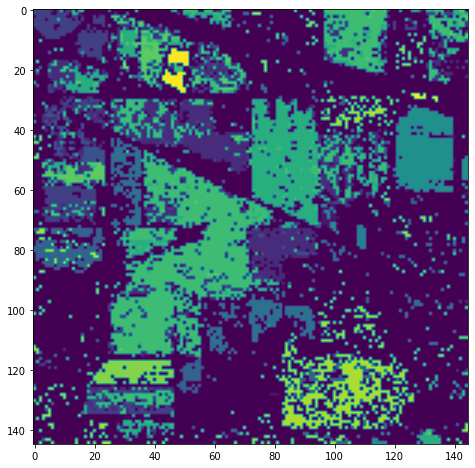

In [ ]:
# Plot the predicted values by reshaping it to (145, 145) size
plt.figure(figsize=(10, 8))
plt.imshow(knn.predict(features_scaled).reshape(145, 145))
plt.show()

**Q:** Is the predicted image identical to the original image?

**A:** Yes, it matches around 70-80% of the ground truth image.



---

